# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import Dataset 

In [2]:
df = pd.read_csv('Student_Performance_Factors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Check the null values in dataset 

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

# fill the NaN value by mean 

In [7]:
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [8]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Visualize the some pattens 

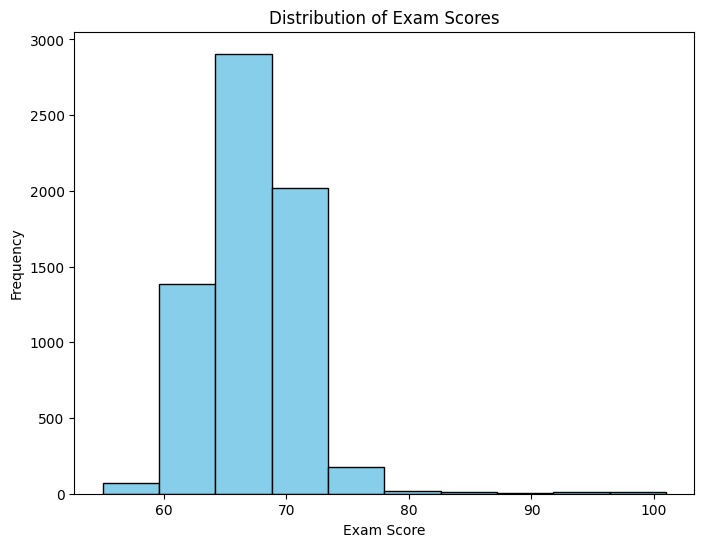

In [9]:
plt.figure(figsize=(8,6))
plt.hist(df['Exam_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

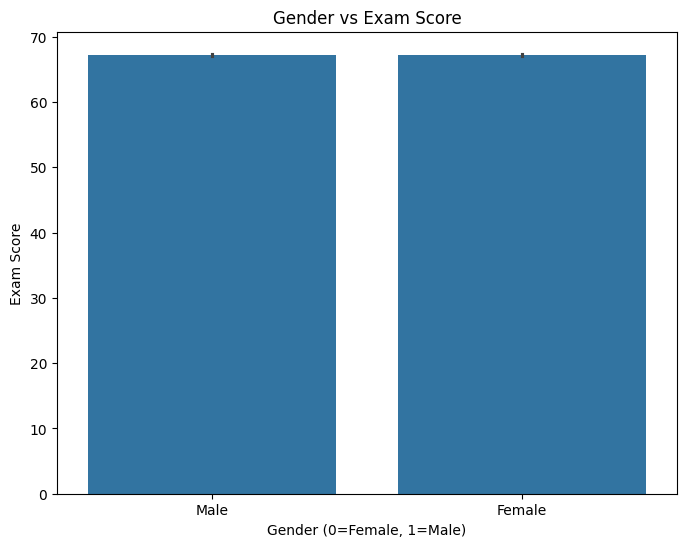

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x='Gender', y='Exam_Score', data=df)
plt.title('Gender vs Exam Score')
plt.xlabel('Gender (0=Female, 1=Male)')
plt.ylabel('Exam Score')
plt.show()

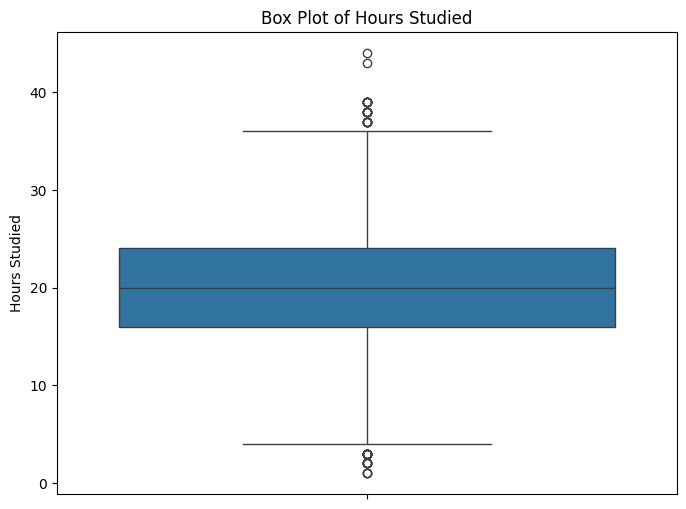

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['Hours_Studied'])
plt.title('Box Plot of Hours Studied')
plt.ylabel('Hours Studied')
plt.show()

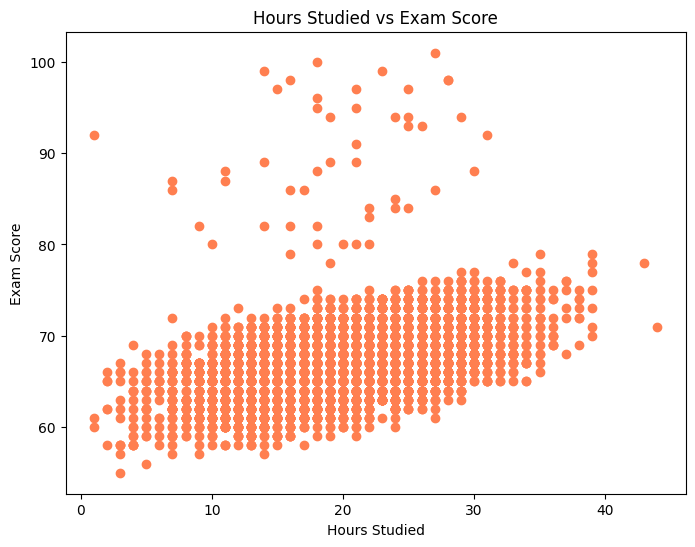

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='coral')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

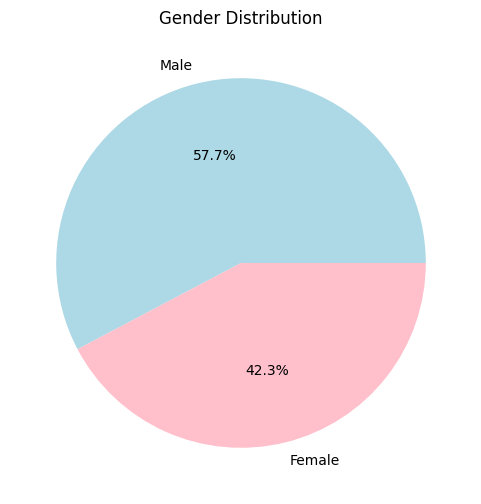

In [14]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.show()

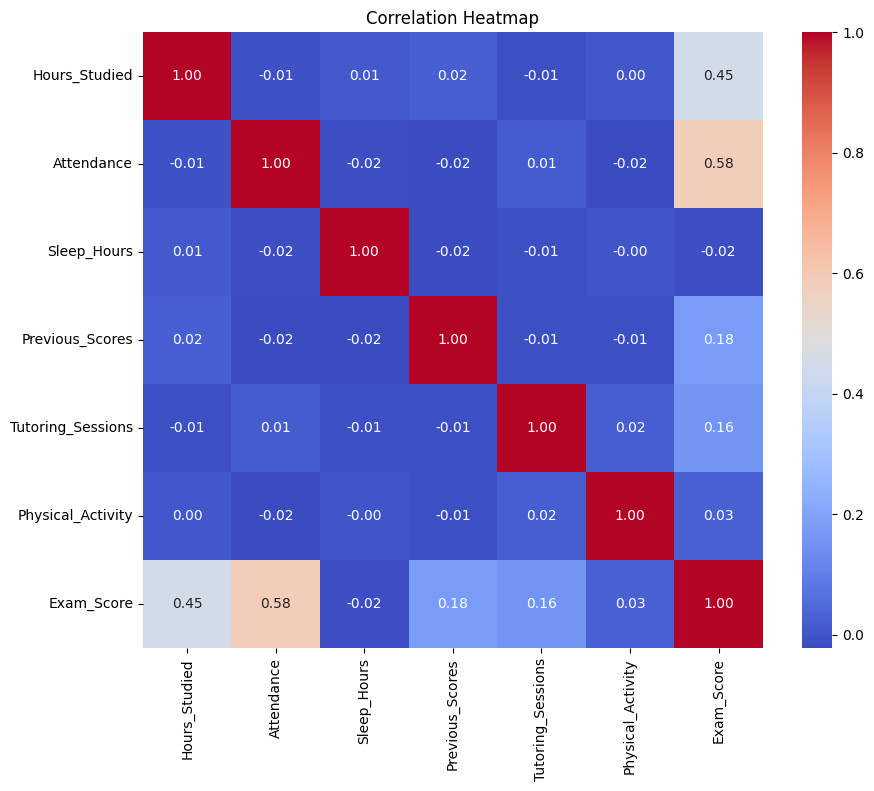

In [15]:
numeric_df = df.select_dtypes(include=[float, int])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Clean the dataset by drop some columns 

In [16]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [17]:
drop_col = ['Motivation_Level','Tutoring_Sessions','Family_Income','School_Type','Peer_Influence','Learning_Disabilities','Distance_from_Home']
df_new = df.drop(columns=drop_col,axis=1)

In [18]:
df_new.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Teacher_Quality,Physical_Activity,Parental_Education_Level,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Yes,Medium,3,High School,Male,67
1,19,64,Low,Medium,No,8,59,Yes,Medium,4,College,Female,61
2,24,98,Medium,Medium,Yes,7,91,Yes,Medium,4,Postgraduate,Male,74
3,29,89,Low,Medium,Yes,8,98,Yes,Medium,4,High School,Male,71
4,19,92,Medium,Medium,Yes,6,65,Yes,High,4,College,Female,70


# Label Encoding 

In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [20]:
df_new['Parental_Involvement'] = label.fit_transform(df_new['Parental_Involvement'])
df_new['Access_to_Resources	'] = label.fit_transform(df_new['Access_to_Resources'])
df_new['Extracurricular_Activities'] = label.fit_transform(df_new['Extracurricular_Activities'])
df_new['Internet_Access'] = label.fit_transform(df_new['Internet_Access'])
df_new['Teacher_Quality'] = label.fit_transform(df_new['Teacher_Quality'])
df_new['Parental_Education_Level'] = label.fit_transform(df_new['Parental_Education_Level'])
df_new['Gender'] = label.fit_transform(df_new['Gender'])

In [21]:
df_new.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Teacher_Quality,Physical_Activity,Parental_Education_Level,Gender,Exam_Score,Access_to_Resources\t
0,23,84,1,High,0,7,73,1,2,3,1,1,67,0
1,19,64,1,Medium,0,8,59,1,2,4,0,0,61,2
2,24,98,2,Medium,1,7,91,1,2,4,2,1,74,2
3,29,89,1,Medium,1,8,98,1,2,4,1,1,71,2
4,19,92,2,Medium,1,6,65,1,0,4,0,0,70,2


In [23]:
df2 = df_new.drop(['Access_to_Resources','Access_to_Resources'],axis=1)

In [24]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Teacher_Quality,Physical_Activity,Parental_Education_Level,Gender,Exam_Score,Access_to_Resources\t
0,23,84,1,0,7,73,1,2,3,1,1,67,0
1,19,64,1,0,8,59,1,2,4,0,0,61,2
2,24,98,2,1,7,91,1,2,4,2,1,74,2
3,29,89,1,1,8,98,1,2,4,1,1,71,2
4,19,92,2,1,6,65,1,0,4,0,0,70,2


In [27]:
df3 = df_new.drop(['Access_to_Resources','Access_to_Resources\t'],axis=1)

In [28]:
df3.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Teacher_Quality,Physical_Activity,Parental_Education_Level,Gender,Exam_Score
0,23,84,1,0,7,73,1,2,3,1,1,67
1,19,64,1,0,8,59,1,2,4,0,0,61
2,24,98,2,1,7,91,1,2,4,2,1,74
3,29,89,1,1,8,98,1,2,4,1,1,71
4,19,92,2,1,6,65,1,0,4,0,0,70


In [30]:
x = df3.drop('Exam_Score',axis=1)
y = df3.Exam_Score

In [31]:
x.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Internet_Access,Teacher_Quality,Physical_Activity,Parental_Education_Level,Gender
0,23,84,1,0,7,73,1,2,3,1,1
1,19,64,1,0,8,59,1,2,4,0,0
2,24,98,2,1,7,91,1,2,4,2,1
3,29,89,1,1,8,98,1,2,4,1,1
4,19,92,2,1,6,65,1,0,4,0,0


# Split the data in train & test

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


# Initializing different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor (SVR)": SVR()
}

# Dictionary to store the r2 scores of different models
model_scores = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = r2_score(y_test, predictions)
    model_scores[name] = score

# Finding the best model based on r2 score
best_model = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model]

best_model, best_score, model_scores


('Linear Regression',
 0.5933778135831121,
 {'Linear Regression': 0.5933778135831121,
  'Random Forest Regressor': 0.5770478567417805,
  'Decision Tree Regressor': 0.04812143323585838,
  'Support Vector Regressor (SVR)': 0.5802007711915982})

# Model Evaluation and Hyperparameter turing 

In [35]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor 
from xgboost import XGBRegressor

In [39]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted) 
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted)) 
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


models = {
    "Linear Regression": LinearRegression(), 
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(), 
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(), 
    "XGBRegressor": XGBRegressor(),
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False)
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = [] 
r2_list =[] 
for i in range(len(list(models))):
    model = list(models.values())[i] 
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    
    
    print(list(models.keys())[i]) 
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print('	')
    
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae)) 
    print("- R2 Score: {:.4f}".format(model_test_r2)) 
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 2.4772
- Mean Absolute Error: 1.3299
- R2 Score: 0.5955
	
Model performance for Test set
- Root Mean Squared Error: 2.4711
- Mean Absolute Error: 1.3285
- R2 Score: 0.5934


Lasso
Model performance for Training set
- Root Mean Squared Error: 2.5604
- Mean Absolute Error: 1.4402
- R2 Score: 0.5678
	
Model performance for Test set
- Root Mean Squared Error: 2.5295
- Mean Absolute Error: 1.4080
- R2 Score: 0.5739


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.4772
- Mean Absolute Error: 1.3299
- R2 Score: 0.5955
	
Model performance for Test set
- Root Mean Squared Error: 2.4711
- Mean Absolute Error: 1.3284
- R2 Score: 0.5934


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2856
- Mean Absolute Error: 1.3327
- R2 Score: 0.6556
	
Model performance for Test set
- Root Mean Squared Error: 2.7257
- Mean Absolute Error: 1.5914
- R2 Score: 0.5053


Deci

In [43]:
y_pred = model.predict(X_test)

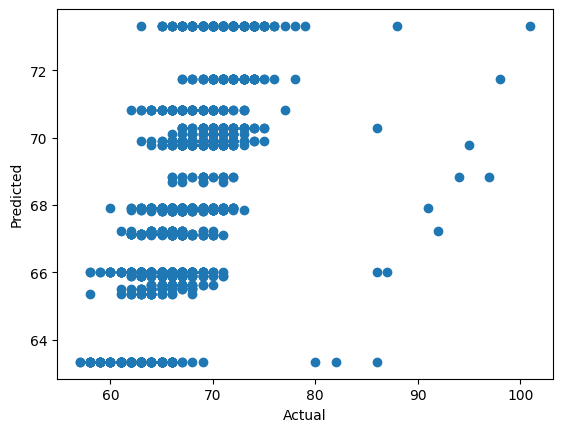

In [44]:
plt.scatter(y_test,y_pred); 
plt.xlabel('Actual'); 
plt.ylabel('Predicted');

# Final Result

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred}) 
pred_df

,Actual Value,Predicted Value,Difference
5621,67,67.224242,-0.224242
6097,68,69.896033,-1.896033
4350,67,67.095238,-0.095238
2150,62,63.339168,-1.339168
1727,67,70.287918,-3.287918
...,...,...,...
5055,71,67.864220,3.135780
4048,66,63.339168,2.660832
5407,70,73.314607,-3.314607
2139,61,63.339168,-2.339168


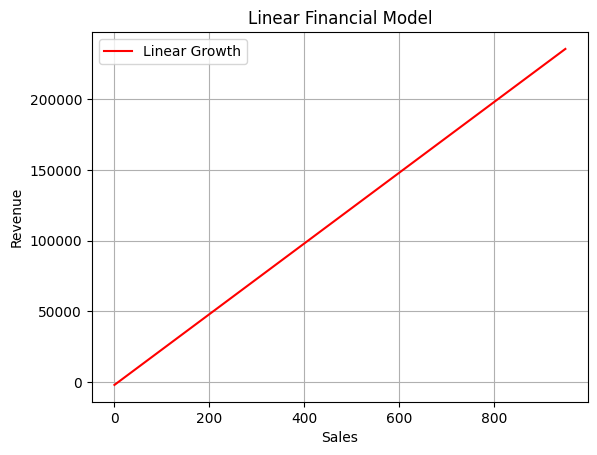

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear model parameters
price_per_product = 250
cost = 2000
sales = np.arange(0, 1000, 50)  # Sales ranging from 0 to 1000

# Linear financial model equation: y = mx + c
revenue = price_per_product * sales - cost

# Plot the linear graph
plt.plot(sales, revenue, color='red', label='Linear Growth')
plt.title('Linear Financial Model')
plt.xlabel('Sales')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()


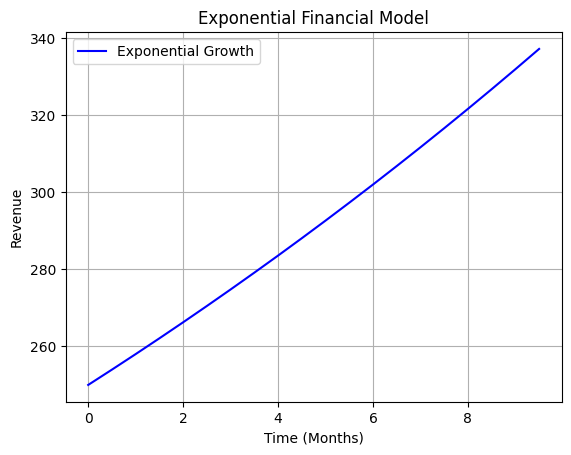

In [2]:
# Exponential model parameters
growth_rate = 0.032
time = np.arange(0, 10, 0.5)  # Time intervals
initial_price = 250

# Exponential financial model equation: y = X * (1 + r)^t
revenue_exponential = initial_price * (1 + growth_rate)**time

# Plot the exponential graph
plt.plot(time, revenue_exponential, color='blue', label='Exponential Growth')
plt.title('Exponential Financial Model')
plt.xlabel('Time (Months)')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend()
plt.show()
